In [42]:
import pandas as pd
import numpy as np

In [43]:
cities = np.array(["Tehran", "Mashhad", "Isfahan", "Tabriz", "Shiraz", "Ahvaz"])
days = np.tile(np.arange(1, 31), len(cities))       # [1,2,...,30,1,2,...,30,...]
city_data = np.repeat(cities, 30)                   # ['Tehran','Tehran',...,'Ahvaz']
temperature = np.random.randint(15, 41, size=len(city_data))
humidity = np.random.randint(20, 81, size=len(city_data))
rainfall = np.random.randint(0, 51, size=len(city_data))
data = pd.DataFrame({
    "city": city_data,
    "day": days,
    "temperature": temperature,
    "humidity": humidity,
    "rainfall": rainfall
})

data


,city,day,temperature,humidity,rainfall
0,Tehran,1,36,33,47
1,Tehran,2,26,40,15
2,Tehran,3,31,79,49
3,Tehran,4,23,35,22
4,Tehran,5,32,64,14
...,...,...,...,...,...
175,Ahvaz,26,25,55,39
176,Ahvaz,27,34,53,35
177,Ahvaz,28,33,77,4
178,Ahvaz,29,20,39,40


In [44]:
mean_stats = data.groupby('city')[['temperature', 'humidity', 'rainfall']].mean()
hottest_city = mean_stats["temperature"].idxmax()
coldest_city = mean_stats["temperature"].idxmin()
rainy_days = data[data["rainfall"] > 10].groupby('city')[['temperature']].count()
# rainy_days = data[data["rainfall"] > 10].groupby('city')[['temperature']].count().sort_values('temperature', ascending=False)

print('Mean stats of cities', mean_stats)
print('Hottest city', hottest_city)
print('Hottest citiy', coldest_city)
print('Rainy Days', rainy_days)

Mean stats of cities          temperature   humidity   rainfall
city                                      
Ahvaz      29.033333  51.566667  25.400000
Isfahan    26.633333  44.900000  30.833333
Mashhad    29.200000  47.633333  24.400000
Shiraz     24.433333  43.733333  25.933333
Tabriz     26.500000  46.800000  24.700000
Tehran     27.600000  51.566667  24.400000
Hottest city Mashhad
Hottest citiy Shiraz
Rainy Days          temperature
city                
Ahvaz             26
Isfahan           26
Mashhad           21
Shiraz            23
Tabriz            24
Tehran            23


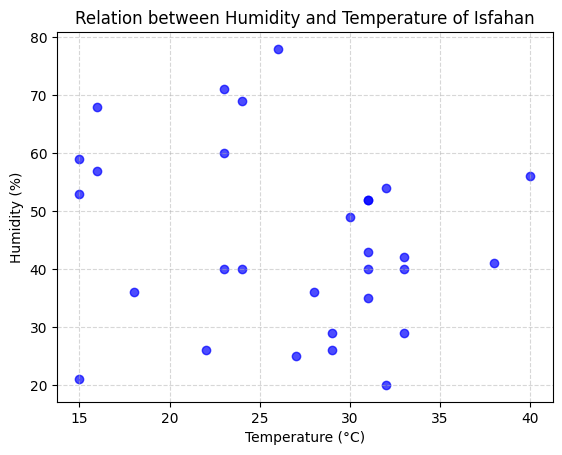

In [45]:
import matplotlib.pyplot as plt

isfahan_data = data[data['city'] == "Isfahan"]
# isfahan_temperatures = data[data['city'] == "Isfahan"]['temperature']
# print(isfahan_humidity)

# رسم نمودار پراکندگی (Scatter Plot)
plt.scatter(isfahan_data['temperature'], isfahan_data['humidity'], color='b', alpha=0.7)

plt.title('Relation between Humidity and Temperature of Isfahan')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### نقاط پراکنده هستند و هیچ ارتباطی به هم ندارند
#### طبیعتا به خاطر تصادفی بودن اطلاعات این موضوع طبیعی است